In [1]:
##############################################################################################
#                                   Import Libraries
##############################################################################################
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import binary_crossentropy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.optimizers import adam, rmsprop
from keras import initializers
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [2]:
##############################################################################################
#                                   Load Dataset
##############################################################################################
Cancer = pd.read_csv(r"C:\Users\Ramatu's PC\Desktop\430pm\Cancerdata.csv")

In [3]:
##############################################################################################
#                                    Dataset Cleaning
##############################################################################################
# drop the ID column
Cancer.drop(['id'], axis=1, inplace = True)

#strip() takes out leading and trailing spaces
Cancer.columns.str.strip()

#View the first five rows
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
##############################################################################################
#                       Split the dataset into input (X) and output (Y)
##############################################################################################
X = Cancer.drop('diagnosis',axis=1)
Y = Cancer['diagnosis']

In [5]:
##############################################################################################
#                         Encode Class value as integer
##############################################################################################
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


In [7]:
# baseline model

def create_baseline():
        # Create a Sequential model and add layers one at a time until the desired network topology is 
    #achieved
    model = Sequential()

    # Create the first layer. check that the input layer has the right number of dimension by using
    # input_dim argument and setting it to 30 for the 30 input variables
    model.add(Dense(34, input_dim = 30, kernel_initializer ='uniform', activation = 'relu'))
    # The first hidden layer has 34 neurons and expects 30 input variables
    # The initialization method is uniform --- The network weights is initialized to a small random
    #number generated from the uniform distribution --- Keras default (0 and 0.05)
    # The activation function for the first layer is relu

    # Create second Layer
    model.add(Dense(30, kernel_initializer ='uniform', activation = 'relu'))

    # Create third Layer
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Sigmoid activation function --- to ensure that the network output is between 0 and 1
    #the final layer predicts class --- Malignant, or Benign
    

    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# evaluate model with standardized dataset
estimator_B = KerasClassifier(build_fn=create_baseline, nb_epoch=150, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS = cross_val_score(estimator_B, X_train, y_train, cv=kfold)
results_VS = cross_val_score(estimator_B, X_test, y_test, cv=kfold)
print("Baseline Train set: %.2f%% (%.2f%%)" % (results_TS.mean()*100, results_TS.std()*100))
print("Baseline Test set: %.2f%% (%.2f%%)" % (results_VS.mean()*100, results_VS.std()*100))

Baseline Train set: 77.37% (12.94%)
Baseline Test set: 64.93% (18.73%)


In [8]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
estimator_B.fit(X_train, y_train)

y_pred_B = estimator_B.predict(X_test)
scores = cross_val_score(estimator_B, X_test, y_test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_B, y_test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred_B))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_test,y_pred_B))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_test = y_test.ravel() 
y_pred_B= y_pred_B.ravel() 

print('Misclassified examples: %d' % (y_test != y_pred_B).sum())
print('Misclassification rate: %.3f' % ((y_test != y_pred_B).sum()/y_pred_B.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(estimator_B.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(estimator_B.score(X_train, y_train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.427

KerasClassifier Confusion Matrix:

[[10 98]
 [ 0 63]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.09      0.17       108
           1       0.39      1.00      0.56        63

    accuracy                           0.43       171
   macro avg       0.70      0.55      0.37       171
weighted avg       0.78      0.43      0.31       171

Mean ROC AUC: 0.748

Misclassified examples: 98
Misclassification rate: 0.609 %
Test set Accuracy: 0.427
Training set Accuracy: 0.445
--------------- KerasClassifier: classifier.fit [Done]


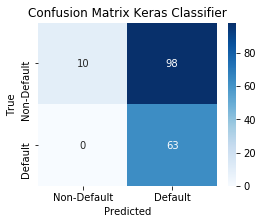

In [9]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test, y_pred_B)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

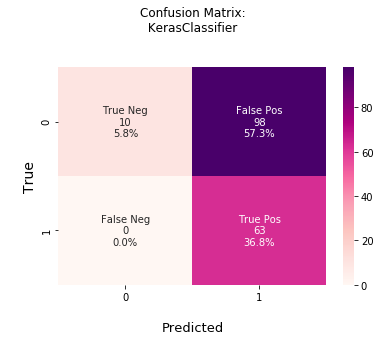

In [10]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

In [14]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, nb_epoch=150,
batch_size=10, verbose=0)))
pipeline_ST = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS2 = cross_val_score(pipeline_ST, X_train, y_train, cv=kfold)
results_VS2 = cross_val_score(pipeline_ST, X_test, y_test, cv=kfold)
print("Standardized Train set: %.2f%% (%.2f%%)" % (results_TS2.mean()*100, results_TS2.std()*100))
print("Standardized Test set: %.2f%% (%.2f%%)" % (results_VS2.mean()*100, results_TS2.std()*100))

Standardized Train set: 93.96% (3.96%)
Standardized Test set: 85.33% (3.96%)


In [15]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
pipeline_ST.fit(X_train, y_train)

y_pred_ST = pipeline_ST.predict(X_test)
scores_ST = cross_val_score(pipeline_ST, X_test, y_test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_ST, y_test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred_ST))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_test,y_pred_ST))
print('Mean ROC AUC: %.3f' % scores_ST.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_test = y_test.ravel() 
y_pred_ST= y_pred_ST.ravel() 

print('Misclassified examples: %d' % (y_test != y_pred_ST).sum())
print('Misclassification rate: %.3f' % ((y_test != y_pred_ST).sum()/y_pred_ST.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(pipeline_ST.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(pipeline_ST.score(X_train, y_train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.930

KerasClassifier Confusion Matrix:

[[102   6]
 [  6  57]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.90      0.90        63

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

Mean ROC AUC: 0.978

Misclassified examples: 12
Misclassification rate: 0.190 %
Test set Accuracy: 0.930
Training set Accuracy: 0.937
--------------- KerasClassifier: classifier.fit [Done]


power of standardization

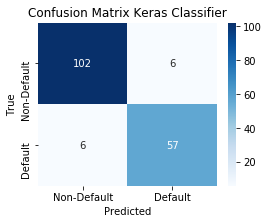

In [17]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test, y_pred_ST)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-Default', 'Default'], 
            yticklabels = ['Non-Default', 'Default'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Keras Classifier");

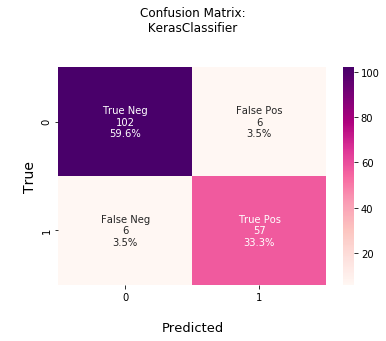

In [18]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

In [19]:
##############################################################################################
#                       Define The Neural Network Model
##############################################################################################


def create_model(optimizer= 'rmsprop' , kernel_initializer= 'glorot_uniform' ):
    
    # Create a Sequential model and add layers one at a time until the desired network topology is 
    #achieved
    model = Sequential()

    # Create the first layer. check that the input layer has the right number of dimension by using
    # input_dim argument and setting it to 30 for the 30 input variables
    model.add(Dense(34, input_dim = 30, kernel_initializer ='uniform', activation = 'relu'))
    # The first hidden layer has 34 neurons and expects 30 input variables
    # The initialization method is uniform --- The network weights is initialized to a small random
    #number generated from the uniform distribution --- Keras default (0 and 0.05)
    # The activation function for the first layer is relu

    # Create second Layer
    model.add(Dense(30, kernel_initializer ='uniform', activation = 'relu'))

    # Create third Layer
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Sigmoid activation function --- to ensure that the network output is between 0 and 1
    #the final layer predicts class --- Malignant, or Benign

    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= optimizer , metrics=[ "accuracy" ])
    return model

In [20]:
##############################################################################################
#                                Build Pipeline + RandomizedSearch (Parameter Tunning)
##############################################################################################
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_model, verbose=0)))
pipeline = Pipeline(estimators)

# define the grid search parameters
param_dist = {
    'mlp__epochs': [50, 100, 150],
    'mlp__kernel_initializer': [ 'glorot_uniform', 'uniform', 'normal'], 
    'mlp__batch_size':[5, 10, 20],
    'mlp__optimizer':["rmsprop" , "adam" ]
}
from time import time
t0 = time()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
search = RandomizedSearchCV(pipeline, param_distributions = param_dist, cv=cv)
#fit the search
clf = search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

done in 497.189s
Best parameter (CV score=0.977):
{'mlp__optimizer': 'adam', 'mlp__kernel_initializer': 'glorot_uniform', 'mlp__epochs': 50, 'mlp__batch_size': 20}


In [21]:
#----------Test Best Parameters---------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time
t0 = time()
clf =clf.best_estimator_
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scores_cv = cross_val_score(clf, X_train, y_train, cv=cv)

scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)


done in 0.154s


In [22]:
#---------Classification report--------
print ("----------------------> [KerasClassifier performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv.mean(),
                                          scores_cv.std()),
                                          end="\n\n" )
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_test,y_pred))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_test = y_test.flatten() 
y_pred= y_pred.flatten() 

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Misclassification/Error rate: %.3f' % ((y_test != y_pred).sum()/y_pred.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(clf.score(X_train, y_train)))
print('--------------- KerasClassifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.959
mean: 0.977 (std: 0.018)


KerasClassifier Confusion Matrix:

[[105   3]
 [  4  59]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Mean ROC AUC: 0.995

Misclassified examples: 7
Misclassification/Error rate: 0.113 %
Test set Accuracy: 0.959
Training set Accuracy: 0.995
--------------- KerasClassifier --Parameters specified-- : classifier.fit [Done]


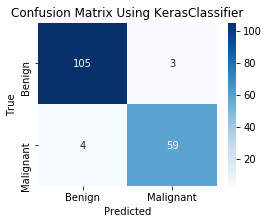

In [23]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Benign', 'Malignant'], 
            yticklabels = ['Benign', 'Malignant'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix Using KerasClassifier");

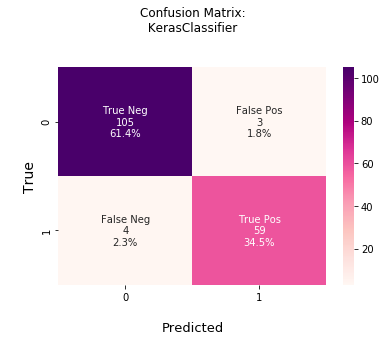

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


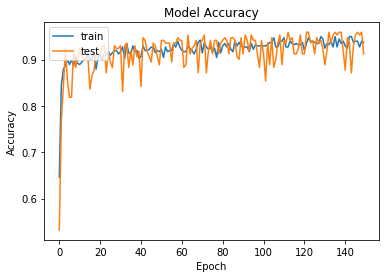

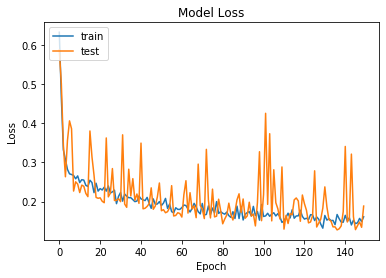

In [25]:
# Fit the model using best parameters
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'Model Accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )

plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'Model Loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
fpr_ST, tpr_ST, thresholds_ST = roc_curve(y_test, y_pred_ST)
auc_ST = auc(fpr_ST, tpr_ST)

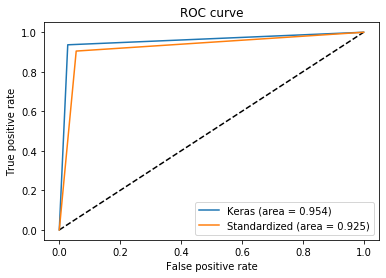

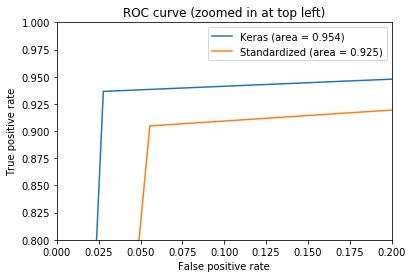

In [28]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_ST, tpr_ST, label='Standardized (area = {:.3f})'.format(auc_ST))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_ST, tpr_ST, label='Standardized (area = {:.3f})'.format(auc_ST))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()